<a href="https://colab.research.google.com/github/Diegosup/Genetic-Algorithm-TSP/blob/main/GA_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

<ipython-input-1-8014618d567b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
# Generating a list of coordenades representing each city
cities=[0,1,2,3,4,5,6,7,8,9,10,11]
adjacency_mat_time = np.asarray( 
[[0,0,0,0,136,0,136,0,0,0,0,0],[0,0,364,120,105,0,0,0,0,0,0,0],[0,235,0,0,0,232,0,0,0,0,0,0],[0,120,0,0,0,120,0,0,0,0,0,0],
[136,105,0,0,0,82,0,0,0,0,0,0],[0,0,232,120,0,0,480,0,454,0,0,0],[136,0,0,0,82,480,0,112,0,225,390,0],[0,0,0,0,0,0,112,0,176,0,200,0],
[0,0,0,0,0,454,0,176,0,0,0,168],[0,0,0,0,0,0,225,0,0,0,150,0],[0,0,0,0,0,0,390,200,0,150,0,0],[0,0,0,0,0,0,0,0,168,0,0,0]])

adjacency_mat_cost = np.asarray([[0,0,0,0,98,0,98,0,0,0,0,0],[0,0,235,40,48,0,0,0,0,0,0,0],[0,235,0,0,0,125,0,0,0,0,0,0],
[0,40,0,0,0,40,0,0,0,0,0,0],[98,48,0,0,0,80,0,0,0,0,0,0],[0,0,125,40,0,0,345,0,240,0,0,0],
[98,0,0,0,80,345,0,185,0,380,400,0],[0,0,0,0,0,0,185,0,180,0,320,0],[0,0,0,0,0,240,0,180,0,0,0,125],
[0,0,0,0,0,0,380,0,0,0,98,0],[0,0,0,0,0,0,400,320,0,98,0,0],[0,0,0,0,0,0,0,0,125,0,0,0]])
name_cities = np.array(['LONDON','AMSTERDAN','BERLIN','COLOGNE','BRUSSELS','FRANKFURT','PARIS','LYON','MILAN','MADRID','BARCELONA','ROME'])

In [ ]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.time=0
        self.best = None
        self.adjacency_mat = adjacency_mat

In [ ]:
def is_valid_path(path, adjacency_matrix):
    # Get matrix dimenssions
    n = len(adjacency_matrix)
    # Veery that the path has at least two nodes
    if len(path) < 2:
        return False
    # Verify any existing nodess in the adjacency matrix
    if not all(node in range(n) for node in path):
        return False
    for i in range(len(path) - 1):
        node1 = path[i]
        node2 = path[i + 1]
        if adjacency_matrix[node1][node2] == 0:
            return False
    # Return when the given path is valid
    return True

In [ ]:
def init_population(cities, adjacency_matrix, n_population, path_length):
    n = len(adjacency_matrix)
    population = []
    while len(population) < n_population:
        path = [np.random.choice(cities)]
        visited_nodes = [False] * n
        visited_nodes[path[0]] = True
        while len(path) < path_length:
            neighbors = [node for node in range(n) if adjacency_matrix[path[-1]][node] != 0 and not visited_nodes[node]]
            if not neighbors:
                break
            next_node = np.random.choice(neighbors)
            path.append(next_node)
            visited_nodes[next_node] = True
        if len(path) < path_length:
            path += [np.random.choice(cities) for _ in range(path_length - len(path))]
        elif len(path) > path_length:
            path = path[:path_length]
        if is_valid_path(path, adjacency_matrix):
            population.append(path)
    return Population(np.asarray(population), adjacency_matrix)


In [ ]:
pop = init_population(cities, adjacency_mat_cost, 5,12)
pop.bag

array([[ 5,  8,  7,  6,  0,  4,  1,  3,  5,  6, 10,  9],
       [11,  8,  7, 10,  9,  6,  0,  4,  5,  3,  1,  2],
       [11,  8,  5,  2,  1,  4,  0,  6,  7, 10,  9,  6],
       [ 9, 10,  7,  8,  5,  3,  1,  4,  0,  6,  7, 10],
       [ 8,  7, 10,  9,  6,  4,  1,  3,  5,  2,  5,  8]])

In [ ]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [ ]:
def fitnessT(self, chromosome):
    return sum(
        [
            adjacency_mat_time[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitnessT = fitnessT

In [ ]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    time = np.asarray(
        [self.fitnessT(chromosome) for chromosome in self.bag]
    )

    valid_indices = np.where(time <= 4320)[0]  # Get indices where time is <= 4320
    if len(valid_indices) > 0:
        valid_distances = distances[valid_indices]
        self.score = np.min(valid_distances)
        best_index = valid_indices[valid_distances.tolist().index(self.score)]
        self.time=time[best_index]
        self.best = self.bag[best_index]
    else:
        self.score = np.inf  # Set score to infinity if there are no valid solutions

    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate

In [ ]:
pop.evaluate()

array([0.18018018, 0.25825826, 0.        , 0.28528529, 0.27627628])

In [ ]:
pop.best

array([ 9, 10,  7,  8,  5,  3,  1,  4,  0,  6,  7, 10])

In [ ]:
pop.score

1667

In [ ]:
hours, minutes = divmod(pop.time, 60)
print(f'Total time: {hours} hours {minutes} minutes')

Total time: 31 hours 49 minutes


In [ ]:
def select(self, k=4):
    fit = self.evaluate()
    while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    self.parents = np.asarray(self.parents)

Population.select = select

In [ ]:
pop.select()
pop.parents

array([[ 9, 10,  7,  8,  5,  3,  1,  4,  0,  6,  7, 10],
       [ 9, 10,  7,  8,  5,  3,  1,  4,  0,  6,  7, 10],
       [ 9, 10,  7,  8,  5,  3,  1,  4,  0,  6,  7, 10],
       [ 8,  7, 10,  9,  6,  4,  1,  3,  5,  2,  5,  8]])

In [ ]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [ ]:
def crossover(self, p_cross=0.1):
    children = []
    count, size = self.parents.shape
    for _ in range(len(self.bag)):
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children

Population.crossover = crossover

In [ ]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [ ]:
pop.mutate()

[[9, 10, 7, 8, 5, 3, 1, 4, 0, 7, 6, 10],
 [9, 10, 7, 8, 5, 3, 1, 4, 0, 6, 7, 10],
 [8, 7, 10, 9, 6, 4, 1, 3, 5, 2, 5, 8],
 [9, 10, 7, 8, 5, 3, 1, 4, 0, 6, 7, 10],
 [8, 7, 10, 9, 6, 4, 1, 3, 5, 2, 5, 8]]

In [ ]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=5,
    n_iter=5,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat_time, 5,12)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            hours, minutes = divmod(pop.time, 60)
            print(f"Generation {i}: {pop.score} , Total time: {hours} hours {minutes} minutes")
        elif i % print_interval == 0:
            hours, minutes = divmod(pop.time, 60)
            print(f"Generation {i}: {pop.score} , Total time: {hours} hours {minutes} minutes")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [ ]:
genetic_algorithm(cities, adjacency_mat_time, verbose=True)

Generation 0: 1768 , Total time: 29 hours 28 minutes
Generation 1: 1768 , Total time: 29 hours 28 minutes
Generation 2: 1768 , Total time: 29 hours 28 minutes
Generation 3: 1768 , Total time: 29 hours 28 minutes
Generation 4: 1768 , Total time: 29 hours 28 minutes


array([ 2,  5,  3,  1,  4,  0,  6,  9, 10,  7,  8, 11])

Generation 0: 1768 , Total time: 29 hours 28 minutes
Generation 1: 1702 , Total time: 28 hours 22 minutes
Generation 2: 1702 , Total time: 28 hours 22 minutes
Generation 3: 1352 , Total time: 22 hours 32 minutes
Generation 4: 1352 , Total time: 22 hours 32 minutes


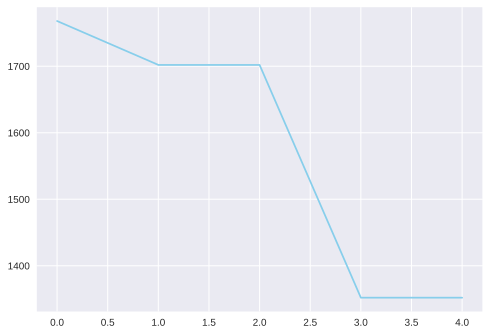

[10, 11, 3, 1, 4, 0, 6, 9, 2, 7, 8, 5]
Best path found: ['BARCELONA', 'ROME', 'COLOGNE', 'AMSTERDAN', 'BRUSSELS', 'LONDON', 'PARIS', 'MADRID', 'BERLIN', 'LYON', 'MILAN', 'FRANKFURT']


In [ ]:
best, history = genetic_algorithm(cities,adjacency_mat_time,n_iter=5,
verbose=False,print_interval=1,return_history=True,)
plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)
print(f"Best path found: {[name_cities[i] for i in best]}")